In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
import seaborn as sns

In [4]:
from scipy import stats

In [5]:
import scipy.stats as stats
from datetime import datetime as dt

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
pip install wordcloud

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
import folium
from folium.plugins import HeatMap

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split

In [10]:
import statsmodels
import statsmodels.api as sm

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier

In [13]:
from xgboost import XGBClassifier

In [14]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [15]:
from xgboost import XGBClassifier

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
customer = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/olist_customers_dataset.csv")

location = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/olist_geolocation_dataset.csv")

orderitem = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/olist_order_items_dataset.csv")

payment = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/olist_order_payments_dataset.csv")

review = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/olist_order_reviews_dataset.csv")

order = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/olist_orders_dataset.csv")

product = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/olist_products_dataset.csv")

seller = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/olist_sellers_dataset.csv")

translation = pd.read_csv("file:///C:/Users/Administrator/Desktop/bdp/product_category_name_translation.csv")


In [18]:
incorrectLocation = location[(location.geolocation_lat > 10) & (location.geolocation_lng < -18)]
incorrectLocation


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
538512                        29654        29.409252       -98.484121   
538557                        29654        21.657547      -101.466766   
585242                        35179        25.995203       -98.078544   
585260                        35179        25.995245       -98.078533   

              geolocation_city geolocation_state  
538512  santo antônio do canaã                ES  
538557  santo antonio do canaa                ES  
585242      santana do paraíso                MG  
585260      santana do paraiso                MG

In [19]:
location.drop(index = [538512, 538557, 585242, 585260], inplace = True)

In [20]:
locationMean = location.groupby('geolocation_zip_code_prefix', as_index = False).agg({'geolocation_lat'  : 'max',
                                                                                            'geolocation_lng'  : 'max'})
locationMean.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
0                         1001       -23.549292       -46.633559
1                         1002       -23.544641       -46.633180
2                         1003       -23.548901       -46.634862
3                         1004       -23.549181       -46.634057
4                         1005       -23.548758       -46.634768

In [21]:
customerDensity = customer.merge(locationMean, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', how = 'left')[['customer_unique_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
customerDensity.head()

customer_unique_id  customer_zip_code_prefix  \
0  861eff4711a542e4b93843c6dd7febb0                     14409   
1  290c77bc529b7ac935b93aa66c333dc3                      9790   
2  060e732b5b29e8181a18229c7b0b2b5e                      1151   
3  259dac757896d24d7702b9acbbff3f3c                      8775   
4  345ecd01c38d18a9036ed96c73b8d066                     13056   

   geolocation_lat  geolocation_lng  
0       -20.468849       -47.382173  
1       -23.659702       -46.530264  
2       -23.527788       -46.652997  
3       -23.493944       -46.172406  
4       -22.961980       -47.125767

In [22]:
customerDensity.dropna(inplace = True)


In [23]:
m = folium.Map(location = customerDensity[['geolocation_lat', 'geolocation_lng']].values.tolist()[0], zoom_start = 13)

# create a list of coordinates
coordinates = customerDensity[['geolocation_lat', 'geolocation_lng']].values.tolist()

# create a heatmap layer with the list of coordinates
heat_layer = HeatMap(coordinates)

# add the heatmap layer to the map
heat_layer.add_to(m)

# display the map
m

In [24]:
merged = customer.merge(order, on = 'customer_id').merge(orderitem, on = 'order_id').merge(product, on = 'product_id').merge(locationMean, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix').merge(payment, on = 'order_id').merge(seller, on = 'seller_id').merge(translation, on = 'product_category_name').merge(review, on = 'order_id', how = 'left')
merged.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

     order_approved_at order_delivered_carrier_date  ...  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1  2017-11-10 00:47:48          2017-11-22 01:43:37  ...   
2  2017-11-10 00:47:48          2017-11-22 01:43:37  ...   
3  2017-05-08 22:22:56          2017-05-19 20:16:31  ...   
4  2018-02-04 22:29:19          2018-02-19 18:21:47  ...   

  seller_zip_code_prefix      seller_city  seller_state  \
0                   8577  itaquaquecetuba            SP   
1                   8577  itaquaquecetuba            SP   
2                   8577  itaquaquecetuba            SP   
3                   8577  itaquaquecetuba            SP   
4                   8577  itaquaquecetuba            SP   

  product_category_name_english                         review_id  \
0              office_furniture  88b8b52d46df026a9d1ad2136a59b30b   
1              office_furniture  7fc63200f12eebb5f387856afdd63db8   
2              office_furniture  7fc63200f12eebb5f387856afdd63db8   
3              office_furniture  251191809e37c1cffc16865947c18a4d   
4              office_furniture  f7123bac5b91a0e2e38d8b41fd1206f4   

  review_score  review_comment_title  \
0          4.0                   NaN   
1          1.0                   NaN   
2          1.0                   NaN   
3          3.0                   NaN   
4          4.0                   NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2017-05-26 00:00:00   
1  GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...  2017-11-29 00:00:00   
2  GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...  2017-11-29 00:00:00   
3  Produto compatível com seu valor, muito bonito...  2017-05-27 00:00:00   
4                            Entregou antes do prazo  2018-03-01 00:00:00   

   review_answer_timestamp  
0      2017-05-30 22:34:40  
1      2017-12-01 19:41:59  
2      2017-12-01 19:41:59  
3      2017-05-28 02:43:16  
4      2018-03-02 11:11:24  

[5 rows x 43 columns]

In [25]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116262 entries, 0 to 116261
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    116262 non-null  object 
 1   customer_unique_id             116262 non-null  object 
 2   customer_zip_code_prefix       116262 non-null  int64  
 3   customer_city                  116262 non-null  object 
 4   customer_state                 116262 non-null  object 
 5   order_id                       116262 non-null  object 
 6   order_status                   116262 non-null  object 
 7   order_purchase_timestamp       116262 non-null  object 
 8   order_approved_at              116248 non-null  object 
 9   order_delivered_carrier_date   115056 non-null  object 
 10  order_delivered_customer_date  113760 non-null  object 
 11  order_estimated_delivery_date  116262 non-null  object 
 12  order_item_id                 

In [26]:
merged.drop(columns = ['order_status', 'order_item_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'seller_id', 'shipping_limit_date', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'geolocation_zip_code_prefix', 'payment_sequential', 'seller_zip_code_prefix', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'seller_city', 'seller_state'], axis = 1, inplace = True)
merged.head()


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7      2018-02-03 19:45:40   

                         product_id   price  freight_value  ...  \
0  a9516a079e37a9c9c36b9b78b10169e8  124.99          21.88  ...   
1  a9516a079e37a9c9c36b9b78b10169e8  112.99          24.90  ...   
2  a9516a079e37a9c9c36b9b78b10169e8  112.99          24.90  ...   
3  a9516a079e37a9c9c36b9b78b10169e8  124.99          15.62  ...   
4  a9516a079e37a9c9c36b9b78b10169e8  106.99          30.59  ...   

   product_length_cm  product_height_cm  product_width_cm  geolocation_lat  \
0               54.0               64.0              31.0       -20.468849   
1               54.0               64.0              31.0        -2.430314   
2               54.0               64.0              31.0        -2.430314   
3               54.0               64.0              31.0       -29.826454   
4               54.0               64.0              31.0       -22.604835   

   geolocation_lng  payment_type payment_installments  payment_value  \
0       -47.382173   credit_card                    2         146.87   
1       -54.693217   credit_card                    1         275.79   
2       -54.693217   credit_card                    1         275.79   
3       -51.245676   credit_card                    7         140.61   
4       -43.026500   credit_card                   10         137.58   

   product_category_name_english review_score  
0               office_furniture          4.0  
1               office_furniture          1.0  
2               office_furniture          1.0  
3               office_furniture          3.0  
4               office_furniture          4.0  

[5 rows x 21 columns]

In [27]:
final = merged.groupby('customer_unique_id', as_index=False).agg({'customer_zip_code_prefix'      : 'max',
                                                                  'customer_city'                 : 'max',
                                                                  'customer_state'                : 'max',
                                                                  'order_id'                      : 'nunique',
                                                                  'product_id'                    : 'nunique',
                                                                  'price'                         : 'sum',
                                                                  'freight_value'                 : 'sum',
                                                                  'product_weight_g'              : 'sum',
                                                                  'product_length_cm'             : 'sum',
                                                                  'product_height_cm'             : 'sum',
                                                                  'product_width_cm'              : 'sum',
                                                                  'geolocation_lat'               : 'mean',
                                                                  'geolocation_lng'               : 'mean',
                                                                  'payment_type'                  : 'max',
                                                                  'payment_installments'          : 'max',
                                                                  'payment_value'                 : 'sum',
                                                                  'review_score'                  : 'mean'})

final.head()


customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state  order_id  product_id   price  freight_value  \
0             SP         1           1  129.90          12.00   
1             SP         1           1   18.90           8.29   
2             SC         1           1   69.00          17.22   
3             PA         1           1   25.99          17.63   
4             SP         1           1  180.00          16.89   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0            1500.0               34.0                7.0              32.0   
1             375.0               26.0               11.0              18.0   
2            1500.0               25.0               50.0              35.0   
3             150.0               19.0                5.0              11.0   
4            6050.0               16.0                3.0              11.0   

   geolocation_lat  geolocation_lng payment_type  payment_installments  \
0       -23.333580       -46.823060  credit_card                     8   
1       -23.545029       -46.781482  credit_card                     1   
2       -27.532246       -48.618667  credit_card                     8   
3        -1.304189       -48.476339  credit_card                     4   
4       -23.496567       -47.462811  credit_card                     6   

   payment_value  review_score  
0         141.90           5.0  
1          27.19           4.0  
2          86.22           3.0  
3          43.62           4.0  
4         196.89           5.0

In [28]:
final.rename(columns = {'order_id' : 'no_of_orders', 'product_id' : 'no_of_products'}, inplace = True)

In [29]:
final['customer_zip_code_prefix'] = final.customer_zip_code_prefix.astype('object')

In [30]:
final.to_csv('final.csv')
merged.to_csv('merged.csv')

In [31]:
recency = merged.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

customer_unique_id     LastPurchaseDate
0  0000366f3b9a7992bf8c76cfdf3221e2  2018-05-10 10:56:27
1  0000b849f77a49e4a4ce2b2a4ca5be3f  2018-05-07 11:11:27
2  0000f46a3911fa3c0805444483337064  2017-03-10 21:05:03
3  0000f6ccb0745a6a4b88665a16c9f078  2017-10-12 20:29:41
4  0004aac84e0df4da2b147fca70cf8255  2017-11-14 19:45:42

In [38]:
print(merged['order_purchase_timestamp'].dtype)


datetime64[ns]


In [39]:
merged['order_purchase_timestamp'] = pd.to_datetime(merged['order_purchase_timestamp'])


In [40]:
recent_date = merged['order_purchase_timestamp'].dt.date.max()
print('The last recent date in the dataset is: ', recent_date)


The last recent date in the dataset is:  2018-09-03


In [41]:
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [42]:
print(recency['LastPurchaseDate'].dtype)


object


In [43]:
recency['LastPurchaseDate'] = pd.to_datetime(recency['LastPurchaseDate'])


In [44]:
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()


customer_unique_id    LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      116
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      119
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      542
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      326
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      293

In [45]:
frequency = merged.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

In [46]:
monetary = merged.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

customer_unique_id  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89

In [47]:
rfm = recency.merge(frequency, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19
2  0000f46a3911fa3c0805444483337064      542          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      293          1    196.89

In [48]:
rfm[rfm.Recency == 0]

customer_unique_id  Recency  Frequency  Monetary
93499  ff22e30958c13ffe219db7d711e8f564        0          2    332.92

In [49]:
rfm[rfm.Recency == 100]

customer_unique_id  Recency  Frequency  Monetary
121    004b45ec5c64187465168251cd1c9c2f      100          2    147.72
1936   053abb2829821b2fafd26639ba5a5b2c      100          1    143.49
3499   096a473366157adf8a459627f97bce1d      100          1    250.89
3714   09ffbf8f6561c852740ab6de31444337      100          1     64.21
6692   12153cd2862ee710eb30e3b9ecc279cc      100          1   1023.87
...                                 ...      ...        ...       ...
88844  f24b71b23f3e91d4310102e9558809b1      100          1     82.83
89515  f41d536fced5c1203d8a07ef09cf823c      100          1    238.48
91868  fa980c101c0dcecaecd3a1b5984c6b5c      100          2    176.09
93455  ff03923ad1eb9e32304deb7f9b2a45c9      100          2    247.06
93601  ff61f2506ff81e50510d8c0ac5570c30      100          1    254.42

[98 rows x 4 columns]

In [50]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

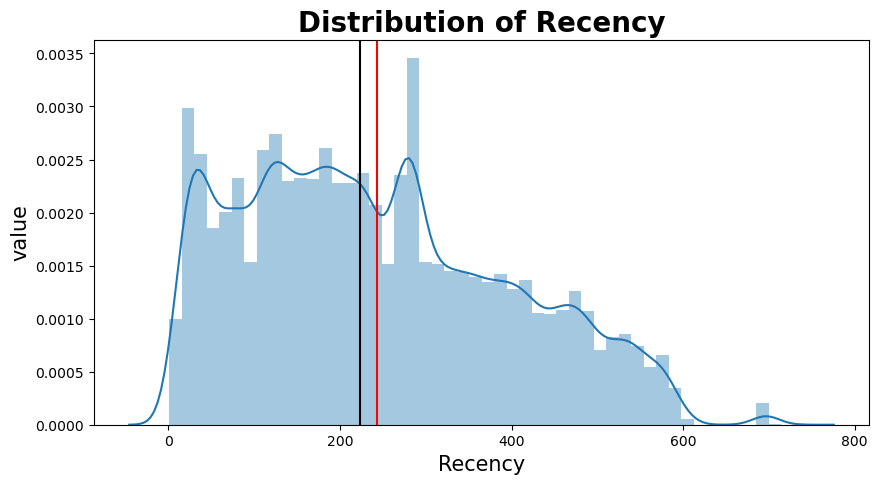

Mean of recency:  242.8308305534536
Median of recency:  223.0
Skewness of recency:  0.45252513788860177


In [51]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontweight='bold',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

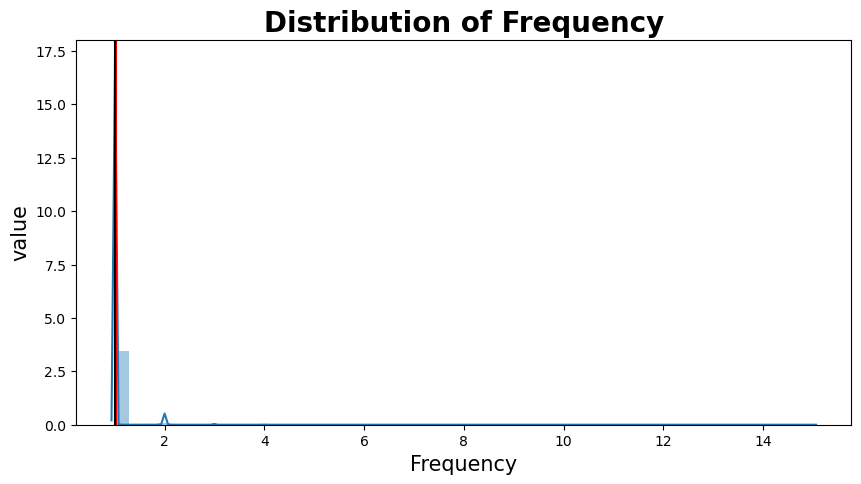

Mean of frequency:  1.0336569717251596
Median of frequency:  1.0
Skewness of frequency:  10.902114915919055


In [52]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

In [57]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19
2  0000f46a3911fa3c0805444483337064      542          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      293          1    196.89

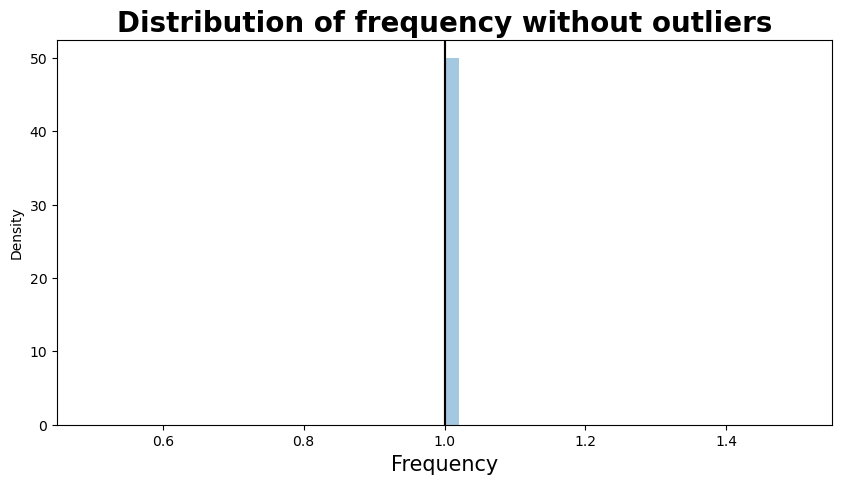

In [58]:
plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

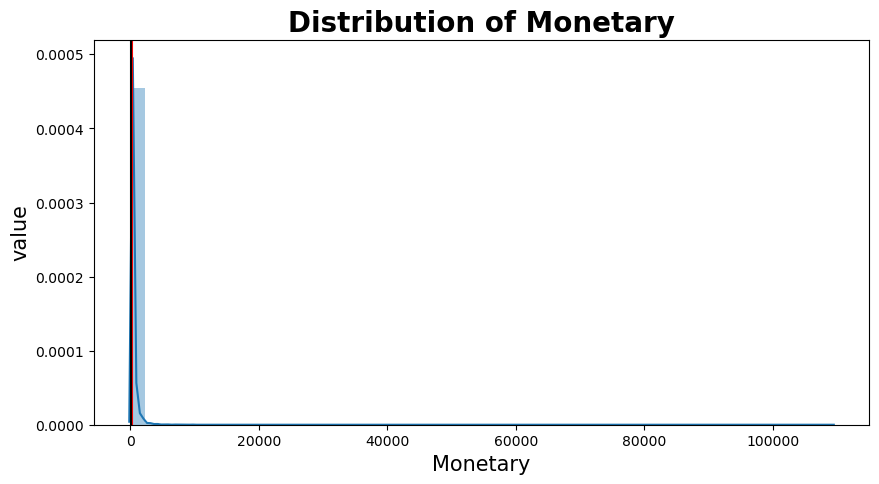

Mean of monetary:  214.21244881646402
Median of monetary:  113.15
Skewness of monetary:  68.46418383727054


In [59]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

In [60]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19
2  0000f46a3911fa3c0805444483337064      542          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      293          1    196.89

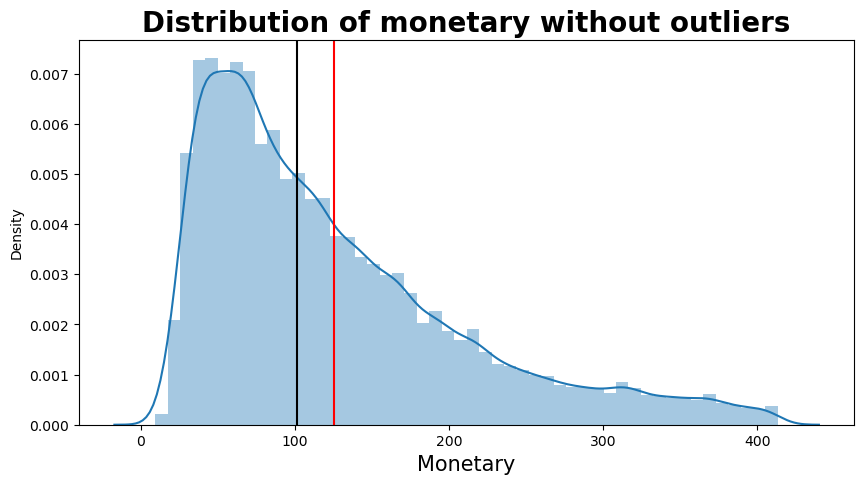

In [61]:
plt.figure(figsize=(10, 5))
sns.distplot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

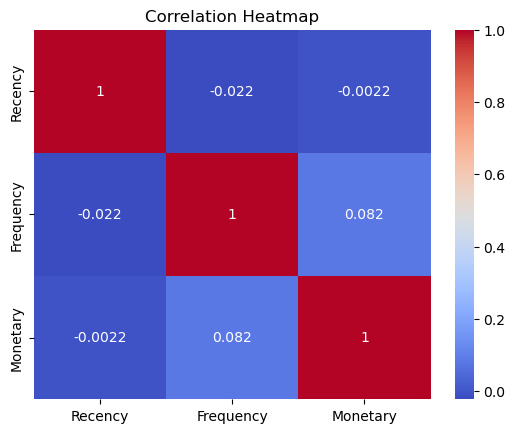

In [63]:
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


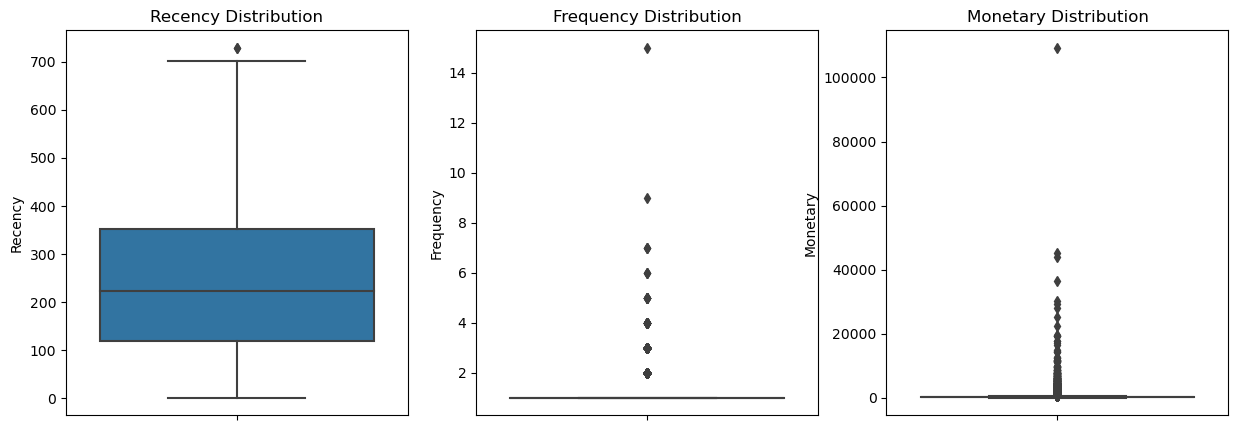

In [64]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y='Recency', data=rfm)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y='Frequency', data=rfm)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y='Monetary', data=rfm)
plt.title('Monetary Distribution')

plt.show()


In [65]:
rfm.to_csv("rfm.csv")

In [66]:
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
rfm.head()

Unnamed: 0.1  Unnamed: 0                customer_unique_id  Recency  \
0             0           0  0000366f3b9a7992bf8c76cfdf3221e2      116   
1             1           1  0000b849f77a49e4a4ce2b2a4ca5be3f      119   
2             2           2  0000f46a3911fa3c0805444483337064      542   
3             3           3  0000f6ccb0745a6a4b88665a16c9f078      326   
4             4           4  0004aac84e0df4da2b147fca70cf8255      293   

   Frequency  Monetary  Churn  
0          1    141.90      0  
1          1     27.19      0  
2          1     86.22      1  
3          1     43.62      1  
4          1    196.89      1

In [67]:
ll_r = rfm.Recency.quantile(0.25)
mid_r = rfm.Recency.quantile(0.50)
ul_r = rfm.Recency.quantile(0.75)
print(ll_r, mid_r, ul_r)

119.0 223.0 352.0


In [68]:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4

In [69]:
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

Unnamed: 0.1  Unnamed: 0                customer_unique_id  Recency  \
0             0           0  0000366f3b9a7992bf8c76cfdf3221e2      116   
1             1           1  0000b849f77a49e4a4ce2b2a4ca5be3f      119   
2             2           2  0000f46a3911fa3c0805444483337064      542   
3             3           3  0000f6ccb0745a6a4b88665a16c9f078      326   
4             4           4  0004aac84e0df4da2b147fca70cf8255      293   

   Frequency  Monetary  Churn  recency_label  
0          1    141.90      0              1  
1          1     27.19      0              1  
2          1     86.22      1              4  
3          1     43.62      1              3  
4          1    196.89      1              3

In [70]:
ll_m = rfm.Monetary.quantile(0.25)
mid_m = rfm.Monetary.quantile(0.50)
ul_m = rfm.Monetary.quantile(0.75)
print(ll_m, mid_m, ul_m)

64.0 113.15 203.77


In [71]:
def monetary_label(money):
    if money <= ll_m:
        return 4
    elif (money > ll_m) and (money <= mid_m):
        return 3
    elif (money > mid_m) and (money <= ul_m):
        return 2
    elif money > ul_m:
        return 1

In [72]:
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm.head()

Unnamed: 0.1  Unnamed: 0                customer_unique_id  Recency  \
0             0           0  0000366f3b9a7992bf8c76cfdf3221e2      116   
1             1           1  0000b849f77a49e4a4ce2b2a4ca5be3f      119   
2             2           2  0000f46a3911fa3c0805444483337064      542   
3             3           3  0000f6ccb0745a6a4b88665a16c9f078      326   
4             4           4  0004aac84e0df4da2b147fca70cf8255      293   

   Frequency  Monetary  Churn  recency_label  monetary_label  
0          1    141.90      0              1               2  
1          1     27.19      0              1               4  
2          1     86.22      1              4               3  
3          1     43.62      1              3               4  
4          1    196.89      1              3               2

In [73]:
rfm.Frequency.value_counts()

Frequency
1     90989
2      2609
3       184
4        30
5         9
6         3
7         3
9         1
15        1
Name: count, dtype: int64

In [74]:
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

In [75]:
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

Unnamed: 0.1  Unnamed: 0                customer_unique_id  Recency  \
0             0           0  0000366f3b9a7992bf8c76cfdf3221e2      116   
1             1           1  0000b849f77a49e4a4ce2b2a4ca5be3f      119   
2             2           2  0000f46a3911fa3c0805444483337064      542   
3             3           3  0000f6ccb0745a6a4b88665a16c9f078      326   
4             4           4  0004aac84e0df4da2b147fca70cf8255      293   

   Frequency  Monetary  Churn  recency_label  monetary_label  frequency_label  
0          1    141.90      0              1               2                4  
1          1     27.19      0              1               4                4  
2          1     86.22      1              4               3                4  
3          1     43.62      1              3               4                4  
4          1    196.89      1              3               2                4

In [76]:
rfm['Rank'] = list(zip(rfm.recency_label, rfm.monetary_label, rfm.frequency_label))
rfm.head()

Unnamed: 0.1  Unnamed: 0                customer_unique_id  Recency  \
0             0           0  0000366f3b9a7992bf8c76cfdf3221e2      116   
1             1           1  0000b849f77a49e4a4ce2b2a4ca5be3f      119   
2             2           2  0000f46a3911fa3c0805444483337064      542   
3             3           3  0000f6ccb0745a6a4b88665a16c9f078      326   
4             4           4  0004aac84e0df4da2b147fca70cf8255      293   

   Frequency  Monetary  Churn  recency_label  monetary_label  frequency_label  \
0          1    141.90      0              1               2                4   
1          1     27.19      0              1               4                4   
2          1     86.22      1              4               3                4   
3          1     43.62      1              3               4                4   
4          1    196.89      1              3               2                4   

        Rank  
0  (1, 2, 4)  
1  (1, 4, 4)  
2  (4, 3, 4)  
3  (3, 4, 4)  
4  (3, 2, 4)

In [77]:
rfm.recency_label.value_counts()

recency_label
1    23701
3    23507
4    23378
2    23243
Name: count, dtype: int64

In [78]:
rfm.frequency_label.value_counts()

frequency_label
4    90989
3     2609
2      184
1       47
Name: count, dtype: int64

In [79]:
rfm.monetary_label.value_counts()

monetary_label
4    23510
1    23455
2    23448
3    23416
Name: count, dtype: int64

In [80]:
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))
rfm.head()

Unnamed: 0.1  Unnamed: 0                customer_unique_id  Recency  \
0             0           0  0000366f3b9a7992bf8c76cfdf3221e2      116   
1             1           1  0000b849f77a49e4a4ce2b2a4ca5be3f      119   
2             2           2  0000f46a3911fa3c0805444483337064      542   
3             3           3  0000f6ccb0745a6a4b88665a16c9f078      326   
4             4           4  0004aac84e0df4da2b147fca70cf8255      293   

   Frequency  Monetary  Churn  recency_label  monetary_label  frequency_label  \
0          1    141.90      0              1               2                4   
1          1     27.19      0              1               4                4   
2          1     86.22      1              4               3                4   
3          1     43.62      1              3               4                4   
4          1    196.89      1              3               2                4   

        Rank rank_rm  
0  (1, 2, 4)  (1, 2)  
1  (1, 4, 4)  (1, 4)  
2  (4, 3, 4)  (4, 3)  
3  (3, 4, 4)  (3, 4)  
4  (3, 2, 4)  (3, 2)

In [81]:
rfm.rank_rm.value_counts()

rank_rm
(1, 2)    6164
(3, 3)    6019
(4, 3)    6016
(1, 1)    5945
(4, 4)    5914
(3, 1)    5888
(1, 4)    5885
(2, 4)    5881
(2, 1)    5856
(2, 2)    5832
(3, 4)    5830
(3, 2)    5770
(4, 1)    5766
(1, 3)    5707
(4, 2)    5682
(2, 3)    5674
Name: count, dtype: int64

In [82]:
C
rfm.head()

NameError: name 'C' is not defined

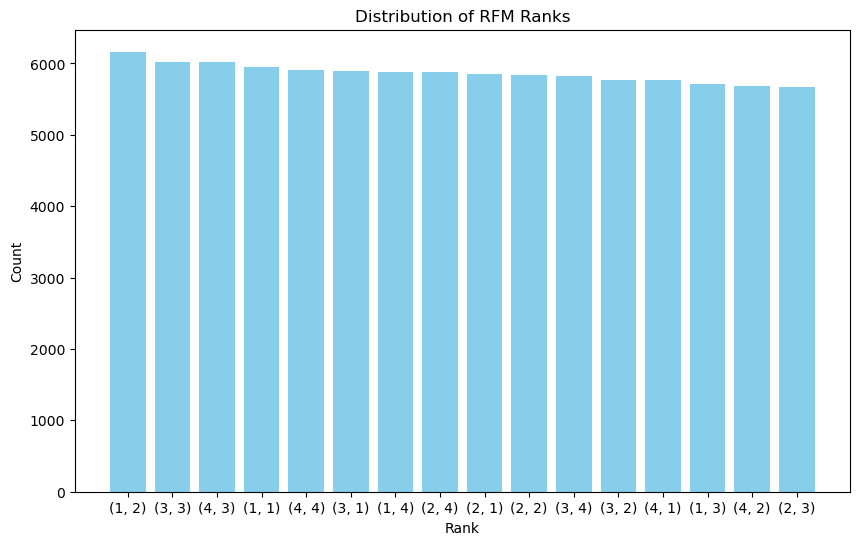

In [83]:
import matplotlib.pyplot as plt

# ランク情報を含むDataFrameの作成
rank_df = rfm['rank_rm'].value_counts().reset_index()
rank_df.columns = ['Rank', 'Count']

# プロット
plt.figure(figsize=(10, 6))
plt.bar(rank_df['Rank'].astype(str), rank_df['Count'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.title('Distribution of RFM Ranks')
plt.show()


In [84]:
churn_counts = rfm['Churn'].value_counts()
print(churn_counts)


Churn
0    51360
1    42469
Name: count, dtype: int64


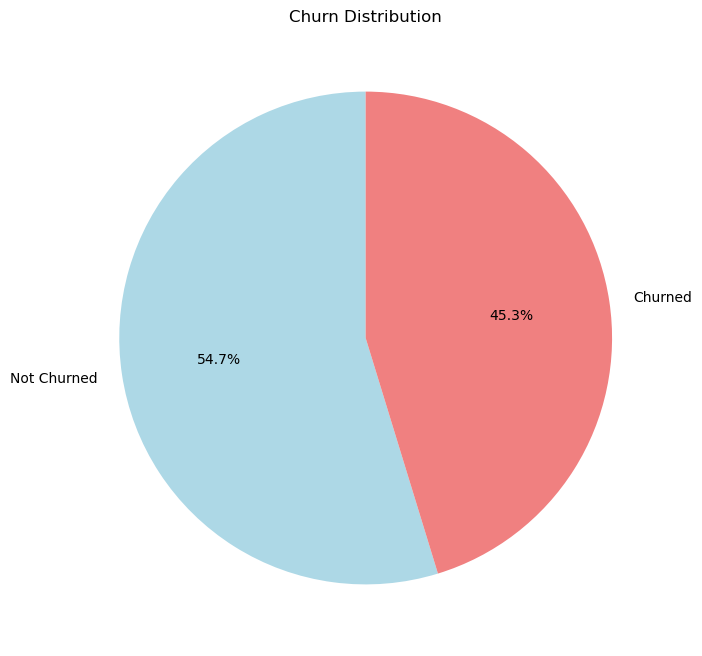

In [85]:
import matplotlib.pyplot as plt

# 'Churn' 列の値の数を取得
churn_counts = rfm['Churn'].value_counts()

# 円グラフの作成
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.show()


DeltaGenerator()

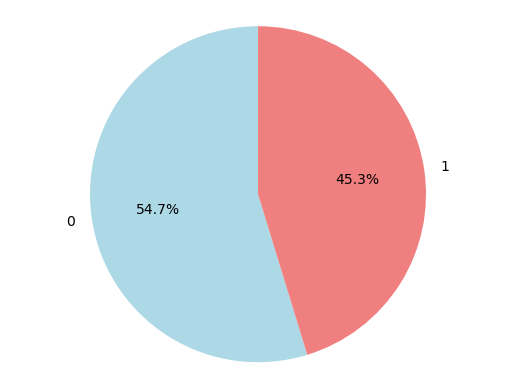

<Figure size 800x600 with 0 Axes>

In [86]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルの読み込み
rfm = pd.read_csv('rfm.csv')

# Streamlitアプリケーションの開始
st.title('RFM Dashboard')

# ランク情報の生成
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm['rank_rm'] = list(zip(rfm['recency_label'], rfm['monetary_label']))

# Churn列の作成
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)

# RFMランクの分布を表示
st.subheader('Distribution of RFM Ranks')
rank_df = rfm['rank_rm'].value_counts().reset_index()
rank_df.columns = ['Rank', 'Count']
st.bar_chart(rank_df.set_index('Rank'))

# Churnの円グラフを表示
st.subheader('Churn Distribution')
churn_counts = rfm['Churn'].value_counts()
fig, ax = plt.subplots()
ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
st.pyplot(fig)

# Recencyの分布を表示
st.subheader('Distribution of Recency')
plt.figure(figsize=(8, 6))
sns.distplot(rfm['Recency'])
st.pyplot()

# 各RFM変数の相関ヒートマップを表示
st.subheader('Correlation Heatmap of RFM Variables')
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
st.pyplot()



In [87]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルの読み込み
rfm = pd.read_csv('rfm.csv')

# Streamlitアプリケーションの開始
st.title('RFM Dashboard')

# ランク情報の生成
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm['rank_rm'] = list(zip(rfm['recency_label'], rfm['monetary_label']))

# Churn列の作成
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)

# RFMランクの分布を表示
st.subheader('Distribution of RFM Ranks')
rank_df = rfm['rank_rm'].value_counts().reset_index()
rank_df.columns = ['Rank', 'Count']
st.bar_chart(rank_df.set_index('Rank'))

# Churnの円グラフを表示
st.subheader('Churn Distribution')
churn_counts = rfm['Churn'].value_counts()
fig, ax = plt.subplots()
ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
st.pyplot(fig)

# Recencyの分布を表示
st.subheader('Distribution of Recency')
plt.figure(figsize=(8, 6))
sns.distplot(rfm['Recency'])
st.pyplot()

# 各RFM変数の相関ヒートマップを表示
st.subheader('Correlation Heatmap of RFM Variables')
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
st.pyplot()




DeltaGenerator()

In [88]:
print(rfm2.columns)

NameError: name 'rfm2' is not defined

In [ ]:
print(rfm.columns)


In [89]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルの読み込み
rfm = pd.read_csv('rfm.csv')

# Streamlitアプリケーションの開始
st.title('RFM Dashboard')

# RFMランクの分布を表示
st.subheader('Distribution of RFM Ranks')
# 'Rank' 列のランク情報を抽出
rank_df = rfm['Rank'].value_counts().reset_index()
rank_df.columns = ['Rank', 'Count']
st.bar_chart(rank_df.set_index('Rank'))

# Churnの円グラフを表示
st.subheader('Churn Distribution')
churn_counts = rfm['Churn'].value_counts()
st.pie_chart(churn_counts)

# Recencyの分布を表示
st.subheader('Distribution of Recency')
plt.figure(figsize=(8, 6))
sns.distplot(rfm['Recency'])
st.pyplot()

# 各RFM変数の相関ヒートマップを表示
st.subheader('Correlation Heatmap of RFM Variables')
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
st.pyplot()


KeyError: 'Rank'

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルの読み込み
rfm = pd.read_csv('rfm.csv')

# Streamlitアプリケーションの開始
st.title('RFM Dashboard')

# RFMランクの分布を表示
st.subheader('Distribution of RFM Ranks')
# 'Rank' 列のランク情報を抽出
rank_df = rfm['Rank'].value_counts().reset_index()
rank_df.columns = ['Rank', 'Count']
st.bar_chart(rank_df.set_index('Rank'))

# Churnの円グラフを表示
st.subheader('Churn Distribution')
churn_counts = rfm['Churn'].value_counts()
st.pie_chart(churn_counts)

# Recencyの分布を表示
st.subheader('Distribution of Recency')
plt.figure(figsize=(8, 6))
sns.distplot(rfm['Recency'])
st.pyplot()

# 各RFM変数の相関ヒートマップを表示
st.subheader('Correlation Heatmap of RFM Variables')
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
st.pyplot()


In [ ]:
pip install  streamlit

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルの読み込み
rfm = pd.read_csv('rfm.csv')

# Streamlitアプリケーションの開始
st.title('RFM Dashboard')

# ランク情報の生成
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm['rank_rm'] = list(zip(rfm['recency_label'], rfm['monetary_label']))

# Churn列の作成
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)

# RFMランクの分布を表示
st.subheader('Distribution of RFM Ranks')
rank_df = rfm['rank_rm'].value_counts().reset_index()
rank_df.columns = ['Rank', 'Count']
st.bar_chart(rank_df.set_index('Rank'))

# Churnの円グラフを表示
st.subheader('Churn Distribution')
churn_counts = rfm['Churn'].value_counts()
fig, ax = plt.subplots()
ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
st.pyplot(fig)

# Recencyの分布を表示
st.subheader('Distribution of Recency')
plt.figure(figsize=(8, 6))
sns.distplot(rfm['Recency'])
st.pyplot()

# 各RFM変数の相関ヒートマップを表示
st.subheader('Correlation Heatmap of RFM Variables')
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
st.pyplot()


In [ ]:
# Streamlit を Jupyter Notebook で使用するための特殊な手順
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

# Streamlit アプリのセットアップと起動
!streamlit hello

# ngrok で Streamlit アプリを公開
ngrok_tunnel = ngrok.connect(port='8501')

# 公開された URL を表示
ngrok_tunnel


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルの読み込み
rfm = pd.read_csv('rfm.csv')

# Streamlitアプリケーションの開始
st.title('RFM Dashboard')

# ランク情報の生成
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm['rank_rm'] = list(zip(rfm['recency_label'], rfm['monetary_label']))

# Churn列の作成
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)

# RFMランクの分布を表示
st.subheader('Distribution of RFM Ranks')
rank_df = rfm['rank_rm'].value_counts().reset_index()
rank_df.columns = ['Rank', 'Count']
st.bar_chart(rank_df.set_index('Rank'))

# Churnの円グラフを表示
st.subheader('Churn Distribution')
churn_counts = rfm['Churn'].value_counts()
fig, ax = plt.subplots()
ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
st.pyplot(fig)

# Recencyの分布を表示
st.subheader('Distribution of Recency')
plt.figure(figsize=(8, 6))
sns.distplot(rfm['Recency'])
st.pyplot()

# 各RFM変数の相関ヒートマップを表示
st.subheader('Correlation Heatmap of RFM Variables')
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
st.pyplot()

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルの読み込み
rfm = pd.read_csv('rfm.csv')

# Streamlitアプリケーションの開始
st.title('RFM Dashboard')

# ランク情報の生成
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm['rank_rm'] = list(zip(rfm['recency_label'], rfm['monetary_label']))

# Churn列の作成
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)

# RFMランクの分布を表示
st.subheader('Distribution of RFM Ranks')
rank_df = rfm['rank_rm'].value_counts().reset_index()
rank_df.columns = ['Rank', 'Count']
st.bar_chart(rank_df.set_index('Rank'))

# Churnの円グラフを表示
st.subheader('Churn Distribution')
churn_counts = rfm['Churn'].value_counts()
fig, ax = plt.subplots()
ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
st.pyplot(fig)

# Recencyの分布を表示
st.subheader('Distribution of Recency')
plt.figure(figsize=(8, 6))
sns.distplot(rfm['Recency'])
st.pyplot()

# 各RFM変数の相関ヒートマップを表示
st.subheader('Correlation Heatmap of RFM Variables')
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
st.pyplot()